In [21]:
import pandas as pd

df_one = pd.read_csv("pulls_2011-2013.csv")
df_two = pd.read_csv("pulls_2014-2018.csv")
df_full = pd.read_csv("pull_files.csv")
print(df_one)


           pid         user                  date
0     11166973  VladimirNik  2013-12-31T23:10:55Z
1     11161892      Ichoran  2013-12-31T16:55:47Z
2     11153894      Ichoran  2013-12-31T02:41:13Z
3     11151917      rklaehn  2013-12-30T23:45:47Z
4     11131244        qerub  2013-12-29T17:21:01Z
...        ...          ...                   ...
3291    547941      xeno-by  2011-12-01T16:16:42Z
3292    547354      szeiger  2011-12-01T14:03:23Z
3293    547150      odersky  2011-12-01T12:39:40Z
3294    547003      robinst  2011-12-01T11:42:26Z
3295    546847      odersky  2011-12-01T10:41:01Z

[3296 rows x 3 columns]
['pid', 'user', 'date']
(85588, 2) ['pid', 'file']


In [132]:
# concat df1 to df2 to change the date format for comparison if not pandas would treat the original dates as normal strings
df_total = pd.concat([df_one,df_two],axis=0)

df_total["date"] = pd.to_datetime(df_total["date"], utc=True)
print(df_total)

           pid         user                      date
0     11166973  VladimirNik 2013-12-31 23:10:55+00:00
1     11161892      Ichoran 2013-12-31 16:55:47+00:00
2     11153894      Ichoran 2013-12-31 02:41:13+00:00
3     11151917      rklaehn 2013-12-30 23:45:47+00:00
4     11131244        qerub 2013-12-29 17:21:01+00:00
...        ...          ...                       ...
2899  11244241       folone 2014-01-06 09:07:34+00:00
2900  11240674     clhodapp 2014-01-06 03:52:23+00:00
2901  11234757      xeno-by 2014-01-05 12:23:24+00:00
2902  11231462      rklaehn 2014-01-04 22:42:02+00:00
2903  11188295      rklaehn 2014-01-02 18:55:33+00:00

[6200 rows x 3 columns]


In [32]:
# inner merge all the data sets 
# use merge instead of concat to keep all the columns 
# combine the data for easy manipulation
data = pd.merge(df_total,df_full, on = "pid")
print(data)

            pid         user                  date  \
0      11166973  VladimirNik  2013-12-31T23:10:55Z   
1      11166973  VladimirNik  2013-12-31T23:10:55Z   
2      11166973  VladimirNik  2013-12-31T23:10:55Z   
3      11166973  VladimirNik  2013-12-31T23:10:55Z   
4      11161892      Ichoran  2013-12-31T16:55:47Z   
...         ...          ...                   ...   
85583  11231462      rklaehn  2014-01-04T22:42:02Z   
85584  11188295      rklaehn  2014-01-02T18:55:33Z   
85585  11188295      rklaehn  2014-01-02T18:55:33Z   
85586  11188295      rklaehn  2014-01-02T18:55:33Z   
85587  11188295      rklaehn  2014-01-02T18:55:33Z   

                                                    file  
0           src/reflect/scala/reflect/api/Printers.scala  
1      src/reflect/scala/reflect/internal/Printers.scala  
2                        test/files/run/reify_ann3.check  
3      test/junit/scala/reflect/internal/PrintersTest...  
4      src/library/scala/collection/mutable/ArrayOps....

In [33]:
print(data.columns.to_list())

['pid', 'user', 'date', 'file']


             pid  user  date  file
month year                        
1     2012   489   489   489   489
      2013  3717  3717  3717  3717
      2014  1140  1140  1140  1140
      2015   732   732   732   732
      2016   640   640   640   640
...          ...   ...   ...   ...
12    2013  1692  1692  1692  1692
      2014  1001  1001  1001  1001
      2015   616   616   616   616
      2016   468   468   468   468
      2017   224   224   224   224

[74 rows x 4 columns]


<AxesSubplot:xlabel='month,year'>

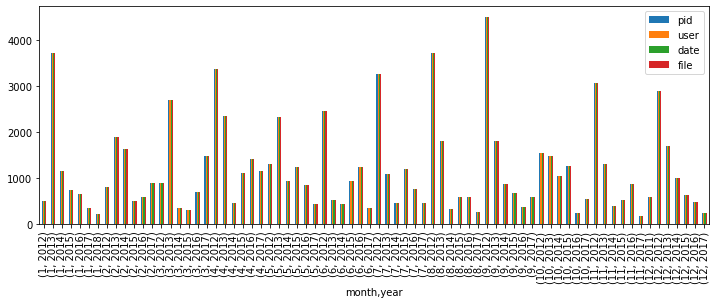

In [38]:
# create 2 columns month and year and group by the 2 columns 
# count the number of pid in one group
data["month"] = pd.DatetimeIndex(data["date"]).month
data["year"] = pd.DatetimeIndex(data["date"]).year

counts = data.groupby(["month","year"]).count()
print(counts)


In [59]:
by_user = data.groupby(["user"]).count()
print(by_user)
#by_user.plot(kind='hist')



               pid  date  file  month  year
user                                       
0xmohit          2     2     2      2     2
193s             4     4     4      4     4
2m              20    20    20     20    20
4.00E+06        22    22    22     22    22
AlexeyIvanov8    2     2     2      2     2
...            ...   ...   ...    ...   ...
yinxusen         1     1     1      1     1
yllan            4     4     4      4     4
ziggystar       22    22    22     22    22
zsxwing          6     6     6      6     6
zuvizudar        1     1     1      1     1

[464 rows x 5 columns]


In [86]:
#find out who was the last 10 pull request and filter what they pulled using pid

last_10 = df_total.sort_values(by="date").tail(10)
joined_pr = df_full.merge(last_10, on="pid")
print(joined_pr)
files = set(joined_pr['file'])


          pid                                               file         user  \
0   163314316                    test/files/pos/t5638/Among.java       hrhino   
1   163314316                   test/files/pos/t5638/Usage.scala       hrhino   
2   163314316                         test/files/pos/t9291.scala       hrhino   
3   163314316                         test/files/run/t8348.check       hrhino   
4   163314316              test/files/run/t8348/TableColumn.java       hrhino   
5   163314316          test/files/run/t8348/TableColumnImpl.java       hrhino   
6   163314316                    test/files/run/t8348/Test.scala       hrhino   
7   163061502            src/library/scala/concurrent/Lock.scala     joroKr21   
8   163057333  src/compiler/scala/tools/nsc/profile/AsyncHelp...    mkeskells   
9   163057333  src/compiler/scala/tools/nsc/profile/Profiler....    mkeskells   
10  162985594  src/compiler/scala/tools/nsc/backend/jvm/BCode...        lrytz   
11  162985594  src/compiler/

In [142]:
#identify who made the chaneg to this specific file 
#pick from the original data 
#in this case we pick from data because we need the user column to be returned in file_pr
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file']==file]
#find out the top 3 author to this file, as they are likely to be the most experienced
author_counts = file_pr.groupby('user').count().sort_values(by='file')['file']
print(author_counts.tail(3))



user
soc          4
retronym     5
xeno-by     11
Name: file, dtype: int64


In [141]:
#in this case we picked from df_full to prevent date bring returned in file_pr and we know we will be combining on pid so the other info are irrelevant 
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = df_full[df_full['file'] == file]

#merge file_pr with df_total 
#find the last 10 most recent pull, this means that you need to keep the date within the dataframe

joined_pr = pd.merge(df_total, file_pr, on='pid' )
print(joined_pr)


          pid          user                      date  \
0    10587633      retronym 2013-12-06 10:04:43+00:00   
1     5320191           soc 2013-04-23 15:47:45+00:00   
2     5291974  bjornregnell 2013-04-22 13:56:06+00:00   
3     5050360      retronym 2013-04-09 06:13:57+00:00   
4     5026775      retronym 2013-04-08 07:07:45+00:00   
5     4786005     starblood 2013-03-25 02:48:48+00:00   
6     4295399      retronym 2013-02-24 21:43:43+00:00   
7     4019878           soc 2013-02-06 18:24:21+00:00   
8     3918789  gkossakowski 2013-01-31 00:43:19+00:00   
9     3854688        melloc 2013-01-26 22:47:32+00:00   
10    3290864         densh 2012-12-08 15:18:04+00:00   
11    2919907         paulp 2012-11-07 21:13:47+00:00   
12    2721711           soc 2012-10-21 19:58:20+00:00   
13    2089264         paulp 2012-08-17 16:15:26+00:00   
14    2072662       xeno-by 2012-08-16 05:39:22+00:00   
15    2071228       xeno-by 2012-08-15 23:41:59+00:00   
16    1984445           soc 201

In [144]:
# now we want to find the contributions by these 2 authors (their pull requests)
import numpy as np 
authors = ['xeno-by', 'soc']
by_author = data[data['user'].map(lambda x: np.isin(x,authors).all())]
print(by_author)

            pid     user                  date  \
25     11126653  xeno-by  2013-12-28T19:39:23Z   
26     11126653  xeno-by  2013-12-28T19:39:23Z   
31     11121557  xeno-by  2013-12-27T23:50:56Z   
32     11121557  xeno-by  2013-12-27T23:50:56Z   
33     11121557  xeno-by  2013-12-27T23:50:56Z   
...         ...      ...                   ...   
85530  11289742  xeno-by  2014-01-07T16:14:56Z   
85531  11289742  xeno-by  2014-01-07T16:14:56Z   
85532  11289742  xeno-by  2014-01-07T16:14:56Z   
85533  11289742  xeno-by  2014-01-07T16:14:56Z   
85581  11234757  xeno-by  2014-01-05T12:23:24Z   

                                                    file  month  year  
25      src/reflect/scala/reflect/internal/Mirrors.scala     12  2013  
26     test/junit/scala/reflect/internal/MirrorsTest....     12  2013  
31                           test/files/neg/t8104a.check     12  2013  
32                  test/files/neg/t8104a/Macros_1.scala     12  2013  
33                    test/files/neg/t8

<AxesSubplot:xlabel='date'>

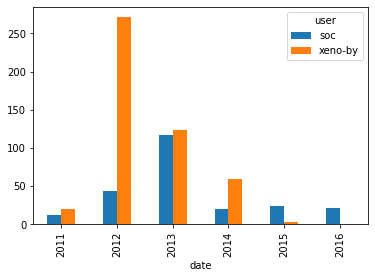

In [172]:
# we want the date to be returned in the final table, we can just use the concat table 
# this is to find the person most involved in projects in the most recent time 
authors = ['xeno-by', 'soc']
by_author = df_total[df_total['user'].isin(authors)]

counts = by_author.groupby(['user',by_author['date'].dt.year]).agg({"pid":"count"}).reset_index()

# convert count into a pivot table to compare the users side by side 
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

counts_wide.plot(kind='bar')

      user  date  pid
0      soc  2012    2
1      soc  2013    2
2  xeno-by  2012   10
3  xeno-by  2014    1


<AxesSubplot:xlabel='date'>

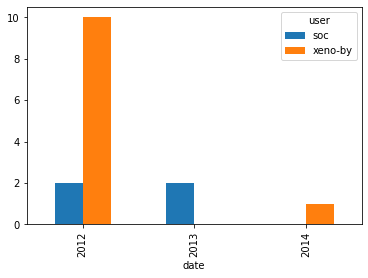

In [194]:
# we are now differentiating the contribution level, whether is it at global or on a smaller scale
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
data["date"] = pd.to_datetime(data["date"], utc=True)

# first compare the pull requests by the 2 authors
by_authors = data[data['user'].isin(authors)]

#we only want details for the specific files
#this way our dataframe consists of only 2 authors' contribution on this specific file
by_file = by_authors[by_authors['file']==file]
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index() #without reset_index() you will return the pid column without the column name
print(grouped)
by_file_wide = grouped.pivot_table(index = 'date', columns='user', values ='pid', fill_value=0)
by_file_wide.plot(kind='bar')
